# Определение выгодного тарифа для телеком компаний

**Описание проекта:** 

Федеральный оператор сотовой связи Компания «Мегалайн» предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Предоставлена небольшая выборка клиентов (500 пользователей «Мегалайна») с данными о клиентах: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

**Задача:** 

На основе данных клиентов оператора сотовой связи проанализировать поведение клиентов и найти выгодный тариф.

Проведем анализ и описание тарифов «Смарт» и «Ультра» в разрезе использованных минут, сообщений и интернет-трафика в месяц. Проверим гипотезы:

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Таким образом, исследование пройдёт в четыре этапа:

1. Изучение данных из файла.
2. Предобработка данных.
3. Анализ и описание данных.
4. Проверка гипотез и пояснения.

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv', sep=',')

In [3]:
df_internet = pd.read_csv('/datasets/internet.csv', sep=',', index_col=0)

In [4]:
df_messages = pd.read_csv('/datasets/messages.csv', sep=',')

In [5]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',')

In [6]:
df_users = pd.read_csv('/datasets/users.csv', sep=',')

**Рассмотрим каждый файл.**

**Таблица calls (информация о звонках).**

In [7]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [8]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
df_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [10]:
df_calls['user_id'].sort_values().unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099,
       1100, 1101, 1102, 1103, 1104, 1105, 1107, 1108, 1109, 1110, 1111,
       1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122,
       1123, 1124, 1125, 1126, 1127, 1129, 1130, 1131, 1132, 1133, 1134,
       1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145,
       1146, 1147, 1148, 1149, 1150, 1151, 1152, 11

**Таблица internet (информация об интернет-сессиях)**

In [11]:
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [12]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [13]:
df_internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


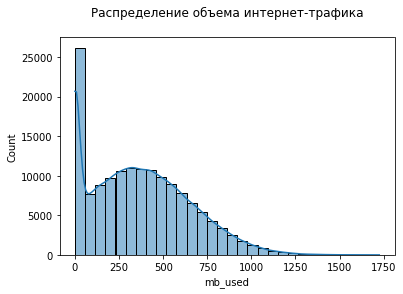

In [14]:
sns.histplot(data=df_internet, x="mb_used", kde=True, bins=30)
plt.title("Распределение объема интернет-трафика" + "\n")
plt.show()

In [15]:
df_internet['user_id'].sort_values().unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1129, 1130, 1131, 1132,
       1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143,
       1144, 1145, 1146, 1147, 1148, 1149, 1150, 11

**Таблица messages (информация о сообщениях).**

In [16]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [17]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [18]:
df_messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [19]:
df_messages['user_id'].sort_values().unique()

array([1000, 1002, 1003, 1004, 1005, 1007, 1008, 1009, 1011, 1012, 1013,
       1014, 1015, 1016, 1018, 1019, 1020, 1021, 1022, 1023, 1025, 1026,
       1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037,
       1038, 1039, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1050,
       1051, 1052, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062,
       1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074,
       1075, 1076, 1077, 1079, 1080, 1081, 1082, 1083, 1084, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1096, 1097, 1098, 1099,
       1100, 1102, 1103, 1104, 1105, 1106, 1108, 1109, 1110, 1111, 1112,
       1113, 1115, 1119, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1130,
       1131, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142,
       1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1154, 1155, 1156,
       1158, 1159, 1160, 1161, 1163, 1164, 1165, 1166, 1167, 1168, 1169,
       1170, 1171, 1172, 1173, 1174, 1176, 1178, 11

**Таблица tariffs (информация о тарифах).**

In [20]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [21]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Таблица users (информация о пользователях)**

In [22]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [23]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [24]:
df_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [25]:
df_users['user_id'].sort_values().unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131,
       1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142,
       1143, 1144, 1145, 1146, 1147, 1148, 1149, 11

Проверим пересечение  уникальных первичных ключей в таблицах (столбец user_id)  между объединяемыми таблицами.

In [26]:
c = list(set(df_calls['user_id']) & set(df_internet['user_id']) & set(df_messages['user_id']) & set(df_users['user_id']))
c

[1000,
 1002,
 1003,
 1004,
 1005,
 1007,
 1008,
 1009,
 1011,
 1012,
 1013,
 1014,
 1015,
 1016,
 1018,
 1019,
 1020,
 1021,
 1022,
 1023,
 1025,
 1026,
 1027,
 1028,
 1029,
 1030,
 1031,
 1032,
 1033,
 1034,
 1035,
 1036,
 1037,
 1038,
 1039,
 1041,
 1042,
 1043,
 1044,
 1045,
 1046,
 1047,
 1048,
 1050,
 1051,
 1052,
 1054,
 1055,
 1056,
 1057,
 1058,
 1059,
 1060,
 1061,
 1062,
 1064,
 1065,
 1066,
 1067,
 1068,
 1069,
 1070,
 1071,
 1072,
 1073,
 1074,
 1075,
 1076,
 1077,
 1079,
 1080,
 1081,
 1082,
 1083,
 1084,
 1086,
 1087,
 1088,
 1089,
 1090,
 1092,
 1093,
 1094,
 1096,
 1097,
 1098,
 1099,
 1100,
 1102,
 1103,
 1104,
 1105,
 1108,
 1109,
 1110,
 1111,
 1112,
 1113,
 1115,
 1119,
 1121,
 1122,
 1123,
 1124,
 1125,
 1126,
 1127,
 1130,
 1131,
 1133,
 1134,
 1135,
 1136,
 1137,
 1138,
 1139,
 1140,
 1141,
 1142,
 1144,
 1145,
 1146,
 1147,
 1148,
 1149,
 1150,
 1151,
 1154,
 1155,
 1156,
 1158,
 1159,
 1160,
 1161,
 1163,
 1164,
 1165,
 1166,
 1167,
 1168,
 1169,
 1170,
 1171,

Итак, в наличии пять файлов, которые содержат информацию  о пользователях компании «Мегалайн». 

Согласно документации к данным:

Таблица **users** (информация о пользователях):
*	`user_id` — уникальный идентификатор пользователя
*	`first_name` — имя пользователя
*	`last_name` — фамилия пользователя
*	`age` — возраст пользователя (годы)
*	`reg_date` — дата подключения тарифа (день, месяц, год)
*	`churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
*	`city` — город проживания пользователя
*	`tariff` — название тарифного плана

Таблица **calls** (информация о звонках):
*	`id` — уникальный номер звонка
*	`call_date` — дата звонка
*	`duration` — длительность звонка в минутах
*	`user_id` — идентификатор пользователя, сделавшего звонок

Таблица **messages** (информация о сообщениях):
*	`id` — уникальный номер сообщения
*	`message_date` — дата сообщения
*	`user_id` — идентификатор пользователя, отправившего сообщение

Таблица **internet** (информация об интернет-сессиях):
*	`id` — уникальный номер сессии
*	`mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
*	`session_date` — дата интернет-сессии
*	`user_id` — идентификатор пользователя

Таблица **tariffs** (информация о тарифах):
*	`tariff_name` — название тарифа
*	`rub_monthly_fee` — ежемесячная абонентская плата в рублях
*	`minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
*	`messages_included` — количество сообщений в месяц, включённых в абонентскую плату
*	`mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
*	`rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
*	`rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
*	`rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

**Описание тарифов**

**Тариф «Смарт»**
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей
**Тариф «Ультра»**
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей

В четырех таблицах у столбцов с датами определяется неверный тип данных. Есть пропущенные значения.

### Вывод

Информация содержится в пяти таблицах:

* таблица **users** содержит информацию непосредственно о пользователях: уникальный идентификатор, имя, фамилию, возраст и город проживания, а также дату подключения, дату прекращения пользования тарифом и название тарифного плана;


* Таблица **calls** содержит информацию  о звонках: уникальный номер, дату и длительность звонка, а также идентификатор пользователя;


* Таблица **messages** содержит информацию о сообщениях: уникальный номер и дату сообщения, а также идентификатор пользователя;



* Таблица **internet** содержит информацию об интернет-сессиях: уникальный номер, дату интернет-сессии, объём потраченного за сессию интернет-трафика, а также идентификатор пользователя;


* Таблица **tariffs** содержит информацию  о тарифах: название тарифа, стоимость абонентской платы и включеные в нее минуты разговора, сообщения, объём интернет-трафика, а также стоимость сверх тарифного пакета.

Предварительно можно утверждать, что, данных достаточно для анализа поведения пользователей и определения тарифа, приносящего большую прибыль. Обнаружены не верные форматы данных и пропущенные значения.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

### Подготовка данных

В четырех таблицах столбцы с датами переведем из типа object в тип datetime методом to_datetime() для того, чтобы можно было совершать операции с данными.

In [27]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls.dtypes

id                   object
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

In [28]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages.dtypes

id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object

In [29]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet.dtypes

id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

In [30]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users.dtypes

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

В столбце **duration**  таблицы **calls** в соответствии с условиями тарифов округлим секунды до минут.

In [31]:
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Пропущенные значения в столбце **churn_date** таблицы **users** по условиям означают, что тариф еще действовал на момент выгрузки данных, поэтому оставим без изменений.

Нулевые значения в столбце **duration** таблицы **calls** по условию означают пропущенные звонки, следовательно можно предположить, что нулевые значения в столбце **mb_used** таблицы **internet** означают неудачные попытки выйти в сеть. Нулевые значения оставляем как есть.

Проверим таблицы на дубликаты.

In [32]:
df_calls.duplicated().sum()

0

In [33]:
df_messages.duplicated().sum()

0

In [34]:
df_internet.duplicated().sum()

0

In [35]:
df_users.duplicated().sum()

0

### Подготовка пользовательских данных



Добавим столбцы с месяцем в таблицы  **calls**, **messages**, **internet**.

In [36]:
df_calls['call_month'] = df_calls['call_date'].astype('datetime64[M]') 
df_calls.head()

,id,call_date,duration,user_id,call_month
0,1000_0,2018-07-25,0,1000,2018-07-01
1,1000_1,2018-08-17,0,1000,2018-08-01
2,1000_2,2018-06-11,3,1000,2018-06-01
3,1000_3,2018-09-21,14,1000,2018-09-01
4,1000_4,2018-12-15,6,1000,2018-12-01


In [37]:
df_messages['message_month'] = df_messages['message_date'].astype('datetime64[M]') 
df_messages.head()

,id,message_date,user_id,message_month
0,1000_0,2018-06-27,1000,2018-06-01
1,1000_1,2018-10-08,1000,2018-10-01
2,1000_2,2018-08-04,1000,2018-08-01
3,1000_3,2018-06-16,1000,2018-06-01
4,1000_4,2018-12-05,1000,2018-12-01


In [38]:
df_internet['session_month'] = df_internet['session_date'].astype('datetime64[M]') 
df_internet.head()

,id,mb_used,session_date,user_id,session_month
0,1000_0,112.95,2018-11-25,1000,2018-11-01
1,1000_1,1052.81,2018-09-07,1000,2018-09-01
2,1000_2,1197.26,2018-06-25,1000,2018-06-01
3,1000_3,550.27,2018-08-22,1000,2018-08-01
4,1000_4,302.56,2018-09-24,1000,2018-09-01


**Посчитаем для каждого пользователя:** 

* **количество сделанных звонков и израсходованных минут разговора по месяцам**

In [39]:
df_calls_pivot = df_calls.pivot_table(index=['user_id', 'call_month'], values='duration', aggfunc=['count','sum'])
df_calls_pivot.columns = ['count_duration', 'sum_duration']
df_calls_pivot.head(10)

count_duration  sum_duration
user_id call_month                              
1000    2018-05-01              22           159
        2018-06-01              43           172
        2018-07-01              47           340
        2018-08-01              52           408
        2018-09-01              58           466
        2018-10-01              57           350
        2018-11-01              43           338
        2018-12-01              46           333
1001    2018-11-01              59           430
        2018-12-01              63           414

* **количество отправленных сообщений по месяцам**

In [40]:
df_messages_pivot = df_messages.pivot_table(index=['user_id', 'message_month'], values='id', aggfunc='count')
df_messages_pivot.columns = ['count_messages'] 
df_messages_pivot.head(10)

count_messages
user_id message_month                
1000    2018-05-01                 22
        2018-06-01                 60
        2018-07-01                 75
        2018-08-01                 81
        2018-09-01                 57
        2018-10-01                 73
        2018-11-01                 58
        2018-12-01                 70
1002    2018-06-01                  4
        2018-07-01                 11

* **объем израсходованного интернет-трафика по месяцам**

In [41]:
df_internet_pivot = df_internet.pivot_table(index=['user_id', 'session_month'], values='mb_used', aggfunc='sum')
df_internet_pivot.head(10)

mb_used
user_id session_month          
1000    2018-05-01      2253.49
        2018-06-01     23233.77
        2018-07-01     14003.64
        2018-08-01     14055.93
        2018-09-01     14568.91
        2018-10-01     14702.49
        2018-11-01     14756.47
        2018-12-01      9817.61
1001    2018-11-01     18429.34
        2018-12-01     14036.66

Соединим таблицы **calls**, **messages**, **internet** и **users** в одну.

In [42]:
df_total = df_calls_pivot.join([df_messages_pivot, df_internet_pivot], how='outer').reset_index()
df_total
df_total.head(10) 

,user_id,level_1,count_duration,sum_duration,count_messages,mb_used
0,1000,2018-05-01,22.0,159.0,22.0,2253.49
1,1000,2018-06-01,43.0,172.0,60.0,23233.77
2,1000,2018-07-01,47.0,340.0,75.0,14003.64
3,1000,2018-08-01,52.0,408.0,81.0,14055.93
4,1000,2018-09-01,58.0,466.0,57.0,14568.91
5,1000,2018-10-01,57.0,350.0,73.0,14702.49
6,1000,2018-11-01,43.0,338.0,58.0,14756.47
7,1000,2018-12-01,46.0,333.0,70.0,9817.61
8,1001,2018-11-01,59.0,430.0,NaN,18429.34
9,1001,2018-12-01,63.0,414.0,NaN,14036.66


In [43]:
df_total_users = df_users.merge(df_total, on='user_id', how='left')
df_total_users = df_total_users.rename(columns={'level_1': 'month'})
df_total_users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,count_duration,sum_duration,count_messages,mb_used
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,22.0,159.0,22.0,2253.49
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-06-01,43.0,172.0,60.0,23233.77
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-07-01,47.0,340.0,75.0,14003.64
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-08-01,52.0,408.0,81.0,14055.93
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-09-01,58.0,466.0,57.0,14568.91


In [44]:
len(df_total_users['user_id'].unique())

500

По условиям тарификации общая сумма веб-трафика за месяц округляется в большую сторону до гигабайтов, поэтому переведем мегабайты в гигабайты.

In [45]:
df_total_users['mb_used'] = np.ceil(df_total_users['mb_used'] / 1024)
df_total_users = df_total_users.rename(columns={'mb_used': 'gb_used'})
df_total_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,count_duration,sum_duration,count_messages,gb_used
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,22.0,159.0,22.0,3.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-06-01,43.0,172.0,60.0,23.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-07-01,47.0,340.0,75.0,14.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-08-01,52.0,408.0,81.0,14.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-09-01,58.0,466.0,57.0,15.0


Проверим и заменим пропущенные значения в столбцах **month**, **count_duration**, **sum_duration**, **count_messages**, **gb_used** на ноль.

In [46]:
df_total_users.query('month.isna()')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,count_duration,sum_duration,count_messages,gb_used
827,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,NaT,NaN,NaN,NaN,NaN
2335,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,NaT,NaN,NaN,NaN,NaN


In [47]:
df_total_users['month_2'] = df_total_users['month'].dt.month

In [48]:
df_total_users['month_2'] = df_total_users['month_2'].fillna(12)
len(df_total_users.query('month.isna()'))

2

In [49]:
len(df_total_users.query('count_duration.isna()'))

42

In [50]:
df_total_users['count_duration'] = df_total_users['count_duration'].fillna(0)
df_total_users['sum_duration'] = df_total_users['sum_duration'].fillna(0)
len(df_total_users.query('count_duration.isna()'))


0

In [51]:
len(df_total_users.query('sum_duration.isna()'))

0

In [52]:
len(df_total_users.query('count_messages.isna()'))

499

In [53]:
df_total_users['count_messages'] = df_total_users['count_messages'].fillna(0)
len(df_total_users.query('count_messages.isna()'))

0

In [54]:
len(df_total_users.query('gb_used.isna()'))

13

In [55]:
df_total_users['gb_used'] = df_total_users['gb_used'].fillna(0)
len(df_total_users.query('gb_used.isna()'))

0

In [56]:
df_total_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3216 non-null   int64         
 1   age             3216 non-null   int64         
 2   churn_date      189 non-null    datetime64[ns]
 3   city            3216 non-null   object        
 4   first_name      3216 non-null   object        
 5   last_name       3216 non-null   object        
 6   reg_date        3216 non-null   datetime64[ns]
 7   tariff          3216 non-null   object        
 8   month           3214 non-null   datetime64[ns]
 9   count_duration  3216 non-null   float64       
 10  sum_duration    3216 non-null   float64       
 11  count_messages  3216 non-null   float64       
 12  gb_used         3216 non-null   float64       
 13  month_2         3216 non-null   float64       
dtypes: datetime64[ns](3), float64(5), int64(2), object(4)
me

In [57]:
df_total_users.describe()

,user_id,age,count_duration,sum_duration,count_messages,gb_used,month_2
count,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000
mean,1251.588930,46.643968,62.999689,450.964241,38.257463,17.288246,8.319652
std,144.645928,16.581233,33.263185,242.096312,36.149684,7.410845,2.905960
min,1000.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1125.000000,32.000000,40.000000,282.000000,9.000000,13.000000,6.000000
50%,1253.000000,46.000000,62.000000,443.000000,30.000000,17.000000,9.000000
75%,1378.250000,62.000000,82.000000,589.000000,57.000000,21.000000,11.000000
max,1499.000000,75.000000,244.000000,1673.000000,224.000000,49.000000,12.000000


Определим **помесячную выручку с каждого пользователя** 



Для этого вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножим на значение из тарифного плана и  прибавим абонентскую плату, соответствующую тарифному плану.

In [58]:
def revenue (df_total_users):
        if df_total_users['tariff'] == 'ultra':
                            
                    if df_total_users['sum_duration'] > df_tariffs.loc[1, 'minutes_included']:
                        rub_minutes = (df_total_users['sum_duration'] - df_tariffs.loc[1, 'minutes_included']) * df_tariffs.loc['rub_per_minute']
                    else:
                        rub_minutes = 0
                    if df_total_users['count_messages'] > df_tariffs.loc[1, 'messages_included']:
                        rub_messages = (df_total_users['count_messages']  - df_tariffs.loc[1, 'messages_included']) * df_tariffs.loc[1, 'rub_per_message']
                    else:
                        rub_messages = 0
                    if df_total_users['gb_used'] > (df_tariffs.loc[1, 'mb_per_month_included'] / 1024):
                        rub_internet = (df_total_users['gb_used'] - (df_tariffs.loc[1, 'mb_per_month_included'] / 1024)) * df_tariffs.loc[1, 'rub_per_gb']
                    else:
                        rub_internet = 0
                    result = rub_minutes + rub_messages + rub_internet + df_tariffs.loc[1, 'rub_monthly_fee']
        elif df_total_users['tariff'] == 'smart':
              
                    if df_total_users['sum_duration'] > df_tariffs.loc[0, 'minutes_included']:
                        rub_minutes = (df_total_users['sum_duration'] - df_tariffs.loc[0, 'minutes_included']) * df_tariffs.loc[0, 'rub_per_minute']
                    else:
                        rub_minutes = 0
                    if df_total_users['count_messages'] > df_tariffs.loc[0, 'messages_included']:
                        rub_messages = (df_total_users['count_messages']  - df_tariffs.loc[0, 'messages_included']) * df_tariffs.loc[0, 'rub_per_message']
                    else:
                        rub_messages = 0
                    if df_total_users['gb_used'] > (df_tariffs.loc[0, 'mb_per_month_included'] / 1024):
                        rub_internet = (df_total_users['gb_used'] - (df_tariffs.loc[0, 'mb_per_month_included'] / 1024))* df_tariffs.loc[0, 'rub_per_gb']
                    else:
                        rub_internet = 0
                    result = rub_minutes + rub_messages + rub_internet + df_tariffs.loc[0, 'rub_monthly_fee']
        return result
                

In [59]:
df_total_users['revenue'] = df_total_users.apply(revenue, axis=1)
df_total_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,count_duration,sum_duration,count_messages,gb_used,month_2,revenue
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,22.0,159.0,22.0,3.0,5.0,1950.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-06-01,43.0,172.0,60.0,23.0,6.0,1950.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-07-01,47.0,340.0,75.0,14.0,7.0,1950.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-08-01,52.0,408.0,81.0,14.0,8.0,1950.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-09-01,58.0,466.0,57.0,15.0,9.0,1950.0
5,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-10-01,57.0,350.0,73.0,15.0,10.0,1950.0
6,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-11-01,43.0,338.0,58.0,15.0,11.0,1950.0
7,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-12-01,46.0,333.0,70.0,10.0,12.0,1950.0
8,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,2018-11-01,59.0,430.0,0.0,18.0,11.0,1150.0
9,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,2018-12-01,63.0,414.0,0.0,14.0,12.0,550.0


## Анализ и описание данных

Найдем среднее арифметическое, дисперсию и стандартное отклонение среднемесячных значений использованных минут, сообщений и интернет-трафика.

In [60]:
(
    df_total_users
         .pivot_table(index = 'tariff', values = ['sum_duration',
       'count_messages', 'gb_used'], aggfunc = ['mean','var', 'std'])
        .rename(columns = {'count_messages':'sms', 'sum_duration':'min_call', 'gb_used':'gb'})
        .style.format("{:.1f}")
)

### Анализ минут

**Тариф ultra.**

* Среднее арифметическое: 526.1
* Дисперсия: 101052.5
* Стандартное отклонение: 317.9

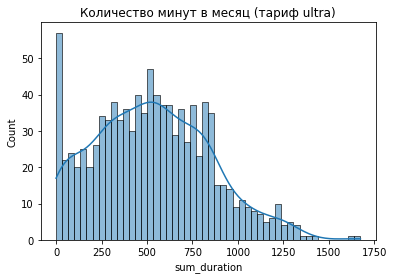

In [61]:
sns.histplot(data=df_total_users.query('tariff == "ultra"'), x="sum_duration", kde=True, bins=50)
plt.title("Количество минут в месяц (тариф ultra)")
plt.show()

Распределение близкое к нормальному. В среднем абоненты тарифа ultra разговаривают почти 9 часов (526 минут) в месяц, в 95% месяцев укладываются в 19 часов (1162 мин.). Все абоненты используют меньше минут, чем входит в абонентскую плату (3000 мин.).

**Тариф smart.**

* Среднее арифметическое: 417.7
* Дисперсия: 36281.4
* Стандартное отклонение: 190.5

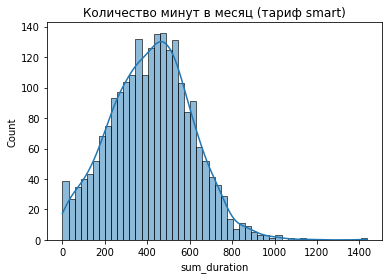

In [62]:
sns.histplot(data=df_total_users.query('tariff == "smart"'), x="sum_duration", kde=True, bins=50)
plt.title("Количество минут в месяц (тариф smart)")
plt.show()

In [63]:
len(df_total_users.query('tariff == "smart" and sum_duration <= 500')) / len(df_total_users.query('tariff == "smart"'))

0.6618834080717488

Распределение близко к нормальному. В среднем абоненты тарифа smart разговаривают почти 7 часов (418 минут) в месяц, в 95% месяцев укладываются в 13 часов (799 мин.). Только в 66% месяцев абоненты не выходят за рамки абонентской платы (500 мин.).

### Анализ сообщений

**Тариф ultra**

* Среднее арифметическое: 49.3
* Дисперсия: 2285.4
* Стандартное отклонение: 47.8

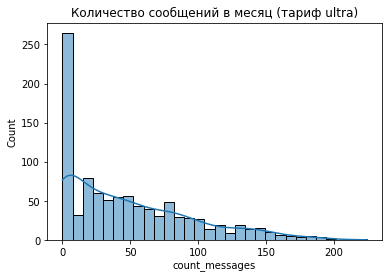

In [64]:
sns.histplot(data=df_total_users.query('tariff == "ultra"'), x="count_messages", kde=True, bins=30)
plt.title("Количество сообщений в месяц (тариф ultra)")
plt.show()

Распределение скошено вправо. В среднем абоненты тарифа ultra отправляют  49 сообщений в месяц, в 95% месяцев укладываются в 145 сообщений. Все абоненты используют меньше сообщений, чем входит в абонентскую плату (1000 сообщений).

**Тариф smart**

* Среднее арифметическое: 33.4
* Дисперсия: 797.0
* Стандартное отклонение: 28.2

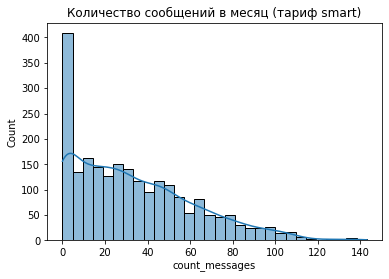

In [65]:
sns.histplot(data=df_total_users.query('tariff == "smart"'), x="count_messages", kde=True, bins=30)
plt.title("Количество сообщений в месяц (тариф smart)")
plt.show()

In [66]:
len(df_total_users.query('tariff == "smart" and count_messages <= 50')) / len(df_total_users.query('tariff == "smart"'))

0.747085201793722

Распределение скошено вправо. В среднем абоненты тарифа smart отправляют 33 сообщения в месяц, в 95% месяцев укладываются в 90 сообщений. Только в 75% месяцев абоненты не выходят за рамки абонентской платы (50 сообщений).

### Анализ интернет-трафика

**Тариф ultra**

* Среднее арифметическое: 19.5
* Дисперсия: 97.4
* Стандартное отклонение: 9.9

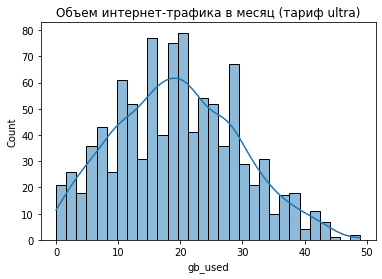

In [67]:
sns.histplot(data=df_total_users.query('tariff == "ultra"'), x="gb_used", kde=True, bins=30)
plt.title("Объем интернет-трафика в месяц (тариф ultra)")
plt.show()

In [68]:
len(df_total_users.query('tariff == "ultra" and gb_used <= 30')) / len(df_total_users.query('tariff == "ultra"'))

0.8640973630831643

Распределение близко к нормальному. В среднем абоненты тарифа ultra используют  19,5 гигабайт в месяц, в 95% месяцев укладываются в 39,2 гигабайта. Только в 86% месяцев абоненты не выходят за рамки абонентской платы (30 гигабайт).

**Тариф smart**

* Среднее арифметическое: 16.3
* Дисперсия: 33.1
* Стандартное отклонение: 5.8

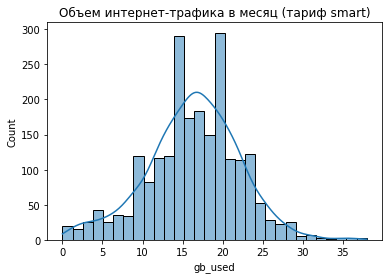

In [69]:
sns.histplot(data=df_total_users.query('tariff == "smart"'), x="gb_used", kde=True, bins=30)
plt.title("Объем интернет-трафика в месяц (тариф smart)")
plt.show()

In [70]:
len(df_total_users.query('tariff == "smart" and gb_used <= 15')) / len(df_total_users.query('tariff == "smart"'))

0.41524663677130047

Распределение близко к нормальному. В среднем абоненты тарифа smart используют  16,3 гигабайта в месяц, в 95% месяцев укладываются в 27,8 гигабайт. Только в 42% месяцев абоненты не выходят за рамки абонентской платы (15 гигабайт).

## Проверка гипотез и пояснения

 ### Cредняя выручка тарифов различается

Проверим гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

**Нулевая гипотеза**: средняя выручка тарифов «Ультра» и «Смарт» равны.

**Альтернативная гипотеза**: средняя выручка тарифов «Ультра» и «Смарт» не равны.

Найдем и сравним дисперсии выручки. 

In [71]:
 np.var(df_total_users.query('tariff == "smart"')['revenue'], ddof=1)

669730.763894807

In [72]:
np.var(df_total_users.query('tariff == "ultra"')['revenue'], ddof=1)

141387.7148093615

Дисперсии не равны, поэтому используем equal_var = False.

In [73]:
alpha = 0.05
results = st.ttest_ind(
    df_total_users.query('tariff == "smart"')['revenue'], 
    df_total_users.query('tariff == "ultra"')['revenue'], 
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.927011394420941e-250
Отвергаем нулевую гипотезу


Таким образом, средняя выручка тарифов «Ультра» и «Смарт» не равны. Найдем среднюю выручку в разрезе тарифов.

In [74]:
print('Средняя выручка для тарифа smart:', round(df_total_users.query('tariff == "smart"')['revenue'].mean()))
print('Средняя выручка для тарифа ultra:', round(df_total_users.query('tariff == "ultra"')['revenue'].mean()))

Средняя выручка для тарифа smart: 1290
Средняя выручка для тарифа ultra: 2070


Тариф ultra выгоднее для компании.

 ### Средняя выручка пользователей из Москвы и из других регионов различается

Проверим гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Нулевая гипотеза**: средняя выручка пользователей из Москвы  и пользователей из других регионов равны.

**Альтернативная гипотеза**: средняя выручка пользователей из Москвы  и пользователей из других регионов  не равны.

Найдем уникальные значения столбца **city**.

In [75]:
df_total_users['city'].sort_values().unique()

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

Найдем и сравним дисперсии выручки. 

In [76]:
np.var(df_total_users.query('city == "Москва"')['revenue'])

564710.7117467273

In [77]:
np.var(df_total_users.query('city != "Москва"')['revenue'])

653818.4925923498

In [78]:
alpha = 0.05
results = st.ttest_ind(
    df_total_users.query('city == "Москва"')['revenue'], 
    df_total_users.query('city != "Москва"')['revenue'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно 54%. 

Таким образом, средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. Найдем среднюю выручку пользователей из Москвы и пользователей из других регионов.

In [79]:
print('Средняя выручка для Москвы:', round(df_total_users.query('city == "Москва"')['revenue'].mean()))
print('Средняя выручка для других регионов:', round(df_total_users.query('city != "Москва"')['revenue'].mean()))

Средняя выручка для Москвы: 1547
Средняя выручка для других регионов: 1525


Выручка практически не отличается.

## Общий вывод

Проведен анализ тарифов **smart** и **ultra** на  выборке в 500 пользователей.  Изучено поведение клиентов и проведена проверка гипотез в рамках средней выручки и сделан вывод — какой тариф лучше.

Абоненты тарифа **smart** :
* минуты: в 66% месяцев абоненты укладываются в абонентскую плату (средняя 418 из 500 мин.);
* сообщения: в 75% месяцев абоненты укладываются в абонентскую плату (средняя 33 из 50 сообщений);
* интернет-трафик: в 42% месяцев абоненты укладываются в абонентскую плату (средняя 16,3 из 15 гигабайт).

Абоненты тарифа **ultra**:
* минуты: все абоненты укладываются в абонентскую плату (средняя 526 из 3000 мин.);
* сообщения: все абоненты укладываются в абонентскую плату (средняя 49 из 1000 сообщений);
* интернет-трафик: в 86% месяцев абоненты укладываются в абонентскую плату (средняя 19,5 из 30 гигабайт).

Абоненты тарифа **ultra** используют в среднем не намного больше минут, сообщений и интернет-трафика. Но средняя выручка компании от них существенно отличается: 2070 рублей против 1290 рублей для тарифа. Тариф **ultra** выгоднее для компании.

Средняя выручка абонентов Москвы и абонентов из других регионов практически не отличается: 1547 рублей для Москвы и 1525 рублей для других регионов.